# Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import os
import sys

# Add ../src to the path
proj_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.insert(0, proj_path)

# Import the parse config function to parse the .toml file
from utils.config_tool import parse_config

# Load the config file
config = parse_config("../config/trade_w_llm.toml")
local_path = os.path.join(config['info']['local_data_path'], 'evaluation')
print(local_path)

/Users/xiaokangwang/Documents/PycharmProjects/Projects for Erdos 2025 spring/dataset/evaluation


In [3]:
env = config['strategy']['environment']
file_name = f"final_results_{env}_"
file_type = ".csv"

file_names = [f for f in os.listdir(local_path) if f.startswith(file_name) and f.endswith(file_type)]
if not file_names:
    raise FileNotFoundError(f"No model files found for {model_name}")
    
# Sort files by modification time (newest first)
files = sorted(file_names, key=lambda x: os.path.getmtime(os.path.join(local_path, x)), reverse=True)
latest_file_path = os.path.join(local_path, files[0])
print(latest_file_path)

/Users/xiaokangwang/Documents/PycharmProjects/Projects for Erdos 2025 spring/dataset/evaluation/final_results_portfolio_False_20250425_002538.csv


In [4]:
# Load the data
df = pd.read_csv(latest_file_path)

In [5]:
df

,Unnamed: 0,date,market_navs,market_returns,DDQN_navs,DDQN_returns,DDQN_0,DDQN_1,DDQN_2,PPO_navs,PPO_returns,PPO_0,PPO_1,PPO_2,A2C_navs,A2C_returns,A2C_0,A2C_1,A2C_2
0,0,2022-03-01,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000,0.000,0.0,1.000000,0.000000,0.0,0.0,0.0
1,1,2022-03-02,1.019935,0.019935,1.000000,0.000000,0.6,0.6,-0.6,1.000000,0.000000,-0.400,0.800,-0.4,1.000000,0.000000,-0.8,0.4,0.0
2,2,2022-03-03,1.027101,0.007026,0.996453,-0.003547,0.6,0.6,-0.6,1.003046,0.003046,-0.400,0.800,-0.4,1.005411,0.005411,-0.8,0.4,0.0
3,3,2022-03-04,1.021275,-0.005672,0.967679,-0.028876,0.6,0.6,-0.6,0.992825,-0.010190,-0.400,1.000,-0.6,1.014521,0.009061,-0.8,0.4,0.0
4,4,2022-03-07,1.022432,0.001132,0.944839,-0.023603,0.6,0.6,-0.6,0.995222,0.002413,-0.400,1.000,-0.6,1.036103,0.021273,-0.8,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,747,2025-02-21,1.620384,-0.004241,1.638963,0.006421,0.6,0.2,-0.6,4.264811,-0.000306,0.375,0.625,0.0,0.866625,0.000989,-0.8,0.4,0.0
748,748,2025-02-24,1.627429,0.004348,1.639272,0.000189,0.6,0.2,-0.6,4.276374,0.002711,0.375,0.625,0.0,0.862439,-0.004830,-0.8,0.4,0.0
749,749,2025-02-25,1.632755,0.003272,1.654541,0.009315,0.6,0.2,-0.6,4.327756,0.012015,0.375,0.625,0.0,0.869289,0.007942,-0.8,0.4,0.0
750,750,2025-02-26,1.601371,-0.019221,1.628396,-0.015802,0.6,0.2,-0.6,4.223173,-0.024166,0.375,0.625,0.0,0.880291,0.012656,-0.8,0.4,0.0


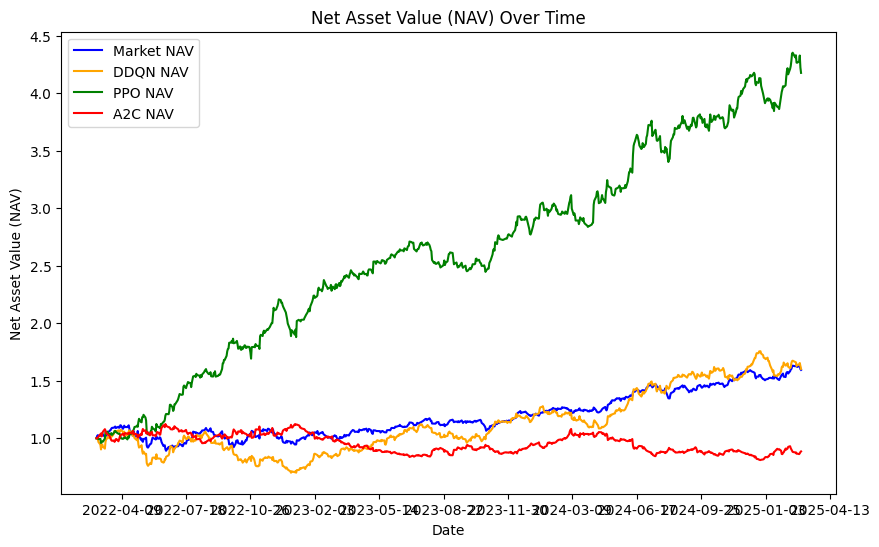

In [8]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['market_navs'], label='Market NAV', color='blue')
plt.plot(df['date'], df['DDQN_navs'], label='DDQN NAV', color='orange')
plt.plot(df['date'], df['PPO_navs'], label='PPO NAV', color='green')
plt.plot(df['date'], df['A2C_navs'], label='A2C NAV', color='red')

# Format the x-axis to show ticks every 30 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))  # Set major ticks every 30 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date labels

plt.xlabel('Date')
plt.ylabel('Net Asset Value (NAV)')
plt.title('Net Asset Value (NAV) Over Time')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['DD'])